In [2]:
from astroquery.vizier import Vizier
import astropy.units as u 
from astropy.coordinates import Angle
import numpy as np 
from astropy.coordinates import SkyCoord
import pandas as pd
import astropy.coordinates as coord
from astropy.table import Table
from astroquery.utils import commons
import ztfquery
from ztfquery import lightcurve
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('Qt5Agg')
import math
from astropy.timeseries import LombScargle


## Каталоги

In [2]:
#очисттить кэш
Vizier.clear_cache()

In [3]:
vizier = Vizier(columns=['**'])
catalog_list = vizier.query_region(coord.SkyCoord(ra="91.88254348", dec="22.35759401528", unit=(u.deg, u.deg), 
                                            frame='icrs'), radius = Angle(0.0001, 'deg'))
catalog_list

TableList with 68 tables:
	'0:I/254/out' with 13 column(s) and 1 row(s) 
	'1:I/271/out' with 21 column(s) and 1 row(s) 
	'2:I/297/out' with 27 column(s) and 1 row(s) 
	'3:I/304/out' with 18 column(s) and 1 row(s) 
	'4:I/305/out' with 33 column(s) and 1 row(s) 
	'5:I/312/sample' with 29 column(s) and 1 row(s) 
	'6:I/317/sample' with 28 column(s) and 1 row(s) 
	'7:I/319/xpm' with 26 column(s) and 1 row(s) 
	'8:I/322A/out' with 62 column(s) and 1 row(s) 
	'9:I/324/igsl3' with 39 column(s) and 1 row(s) 
	'10:I/327/cmc15' with 18 column(s) and 1 row(s) 
	'11:I/329/urat1' with 45 column(s) and 1 row(s) 
	'12:I/337/gaia' with 58 column(s) and 1 row(s) 
	'13:I/339/hsoy' with 31 column(s) and 1 row(s) 
	'14:I/340/ucac5' with 21 column(s) and 1 row(s) 
	'15:I/342/f3' with 20 column(s) and 1 row(s) 
	'16:I/345/gaia2' with 102 column(s) and 1 row(s) 
	'17:I/347/gaia2dis' with 10 column(s) and 1 row(s) 
	'18:I/349/starhorse' with 40 column(s) and 1 row(s) 
	'19:I/350/gaiaedr3' with 116 column(s) an

J/ApJS/249/22/ - ZTF

In [4]:
catalog_list[57]

_r,recno,RAJ2000,DEJ2000,GLON,GLAT,Nep,Dur,DeltaT,dRV,dlogg,dTeff,dFeH,Chi2,RV,e_RV,SpecId,RVmax,RVmin,PV,Type,KIC,Gaia,OName,GCVS,ASASSN-V,LAMOST,RVc
,,deg,deg,deg,deg,,d,d,km / s,log(cm.s**-2),K,,,km / s,km / s,,,,,,,,,,,,
float64,int32,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float32,float32,str36,int16,int16,float32,str32,int32,int64,str30,str6,str19,str6,str3
0.000016,78049,91.8825336,22.3575916,188.1670331,0.9582608,3,354.01099,353.97757,34.37500,0.10313,-22.63965,0.04691,10.91117,-20.6,3.728,20141108-NGC2158_1-05-009,2,1,0.944,;;;;;YSO;;ROT:,--,--,ASASSN-V J060731.81+222127.3,,J060731.81+222127.3,LAMOST,RVc


In [4]:
catalog_list[62]

_r,recno,RAJ2000,DEJ2000,GLON,GLAT,Nep,Dur,DeltaT,dRV,dlogg,dTeff,dFeH,Chi2,RV,e_RV,SpecId,RVmax,RVmin,PV,Type,KIC,Gaia,OName,GCVS,ASASSN-V,LAMOST,RVc
,,deg,deg,deg,deg,,d,d,km / s,log(cm.s**-2),K,,,km / s,km / s,,,,,,,,,,,,
float64,int32,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float32,float32,str36,int16,int16,float32,str32,int32,int64,str30,str6,str19,str6,str3
0.000016,78049,91.8825336,22.3575916,188.1670331,0.9582608,3,354.01099,353.97757,34.37500,0.10313,-22.63965,0.04691,10.91117,-20.6,3.728,20141108-NGC2158_1-05-009,2,1,0.944,;;;;;YSO;;ROT:,--,--,ASASSN-V J060731.81+222127.3,,J060731.81+222127.3,LAMOST,RVc


In [5]:
catalog_list[63]

_r,recno,RAJ2000,DEJ2000,JD,SNR,RV,e_RV,logg,e_logg,Teff,e_Teff,[Fe/H],e_[Fe/H],[a/Fe],e_[a/Fe]
,,deg,deg,d,,km / s,km / s,log(cm.s**-2),log(cm.s**-2),K,K,,,,
float64,int32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64
0.000016,78049,91.8825336,22.3575916,2456970.310,81.442,-25.0,3.105,4.25624,0.093116,4949.21484,147.049927,0.07488,0.097243,0.05288,0.094639
0.000016,158751,91.8825336,22.3575916,2456970.344,49.175,-29.0,3.916,4.26229,0.117460,4903.07080,159.755798,0.03529,0.111145,0.05876,0.091729
0.000016,203606,91.8825336,22.3575916,2457324.321,31.778,5.4,5.082,4.36542,0.173173,4880.43115,176.053680,0.08220,0.111785,-0.01720,0.095670


## Кривые блеска при помощи ztfquery

In [14]:
lc = lightcurve.LCQuery.from_position(91.88254348, 22.35759401528, 2) #Ra, DEC and radius in arcsec
lc_data = lc.data

df = pd.DataFrame(lc_data.values, columns=lc_data.columns, index=lc_data.index)
df.to_csv('ztf_data.csv', header=True, index=False)

In [3]:
data = pd.read_csv('ztf_data.csv')

In [16]:
data['oid'].unique()

array([562113100004843, 562213100027934, 562313100010514, 563116200004372,
       563216200007538, 563316200009455])

In [57]:
'''не запускать'''

band_g = lc.data[(lc.data['filtercode'] == 'zg') & (lc.data['catflags'] == 0)]
band_r = lc.data[(lc.data['filtercode'] == 'zr') & (lc.data['catflags'] == 0)]
band_i = lc.data[(lc.data['filtercode'] == 'zi') & (lc.data['catflags'] == 0)]

NameError: name 'lc' is not defined

In [4]:
band_g = data[(data['filtercode'] == 'zg') & (data['catflags'] == 0)]
band_r = data[(data['filtercode'] == 'zr') & (data['catflags'] == 0)]
band_r_add = data[(data['filtercode'] == 'zr') & (data['catflags'] == 0) & (data['mjd'] <= 60319.15)]
band_i = data[(data['filtercode'] == 'zi') & (data['catflags'] == 0)]

magerr_g = band_g.magerr.to_numpy()
mag_g= band_g.mag.to_numpy()
mjd_g = band_g.mjd.to_numpy()
print("len(mjd_g) =", len(mjd_g))

magerr_r = band_r.magerr.to_numpy()
mag_r= band_r.mag.to_numpy()
mjd_r = band_r.mjd.to_numpy()
print("len(mjd_r) =", len(mjd_r))

magerr_r_add = band_r_add.magerr.to_numpy()
mag_r_add= band_r_add.mag.to_numpy()
mjd_r_add = band_r_add.mjd.to_numpy()
print("len(mjd_r_add) =", len(mjd_r_add))

magerr_i = band_i.magerr.to_numpy()
mag_i = band_i.mag.to_numpy()
mjd_i = band_i.mjd.to_numpy()
print("len(mjd_i) =", len(mjd_i))


len(mjd_g) = 684
len(mjd_r) = 2886
len(mjd_r_add) = 2201
len(mjd_i) = 75


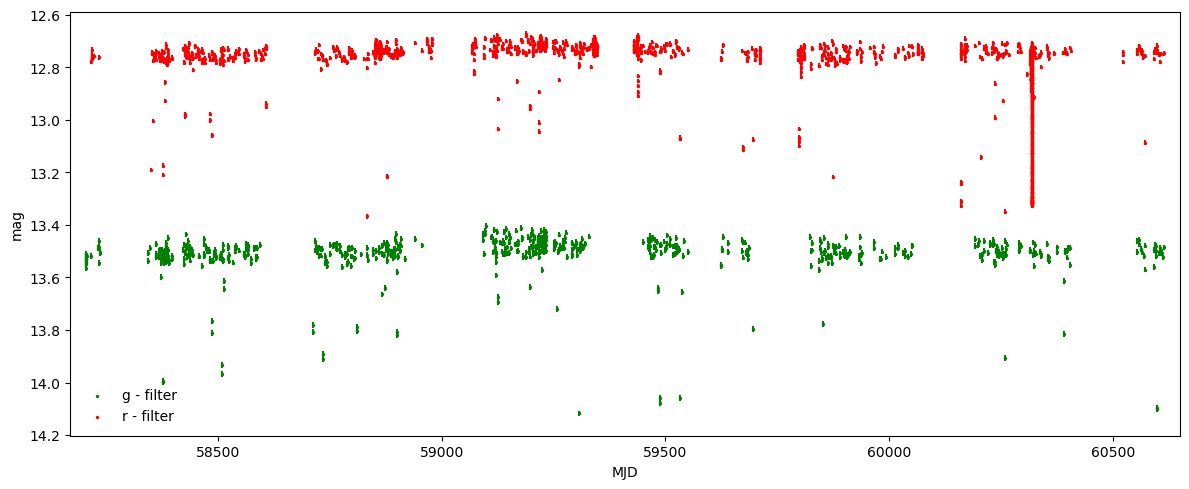

In [5]:
plt.figure(figsize=(12,5))

plt.scatter(band_g.mjd, band_g.mag, s = 2, color = 'green', label = "g - filter")
plt.scatter(band_r.mjd, band_r.mag, s = 2, color = 'red', label = "r - filter")
#plt.scatter(band_i.mjd, band_i.mag, s = 1, color = 'gold', label = "zi")

plt.errorbar(band_g.mjd, band_g.mag, yerr = band_g.magerr, color = 'green', linestyle='none')
plt.errorbar(band_r.mjd, band_r.mag, yerr = band_r.magerr, color = 'red', linestyle='none')

'''
plt.plot_date(band_g.mjd, band_g.mag)
plt.errorbar(band_g.mjd, band_g.mag, yerr = band_g.magerr, fmt='o', ecolor = 'green', color = 'green')
plt.plot_date(band_r.mjd, band_r.mag)
plt.errorbar(band_r.mjd, band_r.mag, yerr = band_r.magerr, fmt='o', ecolor = 'red', color = 'red')
plt.plot_date(band_i.mjd, band_i.mag)
plt.errorbar(band_i.mjd, band_i.mag, yerr = band_i.magerr, fmt='o', ecolor = 'gold', color = 'gold')
'''

plt.xlabel('MJD')
plt.ylabel('mag')
#plt.grid()
plt.xlim(58170, 60650)
plt.legend(frameon=False)
#plt.title("Light Curve")
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig("ZTFlc.png")

plt.show()

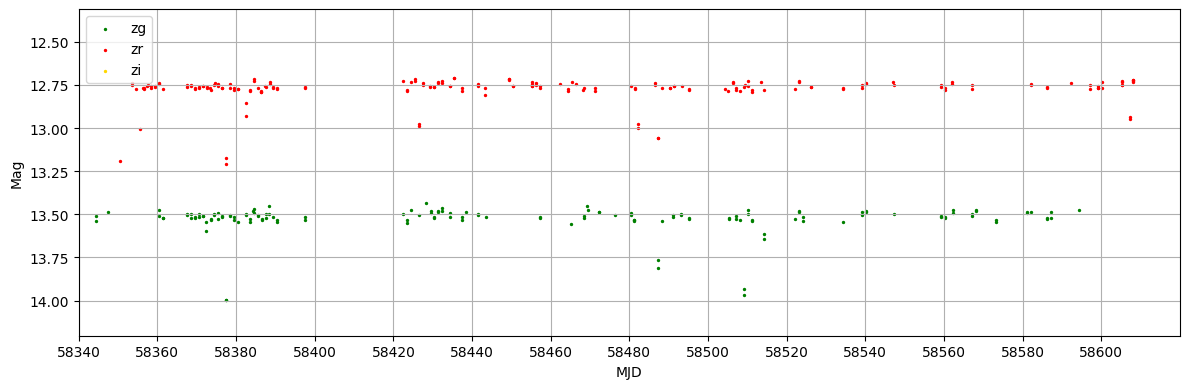

In [156]:
plt.figure(figsize=(12,4))

#plt.subplot(1,2,1)
plt.scatter(band_g.mjd, band_g.mag, s = 2, color = 'green', label = "zg")
plt.scatter(band_r.mjd, band_r.mag, s = 2, color = 'red', label = "zr")
plt.scatter(band_i.mjd, band_i.mag, s = 2, color = 'gold', label = "zi")
#plt.xlim(59050, 59350)
plt.xlim(58340, 58620)
#plt.xticks(np.arange(59050, 59350, 20)) 
plt.xticks(np.arange(58340, 58620, 20)) 
plt.xlabel('MJD')
plt.ylabel('Mag')
plt.grid()
plt.legend()
plt.gca().invert_yaxis()
'''
plt.subplot(1,2,2)
plt.scatter(band_g.mjd, band_g.mag, s = 1, color = 'green', label = "zg")
plt.scatter(band_r.mjd, band_r.mag, s = 1, color = 'red', label = "zr")
plt.xlim(60319.12, 60319.3)
plt.xlabel('MJD')
plt.ylabel('Mag')
plt.grid()
plt.legend()
plt.gca().invert_yaxis()
'''
plt.tight_layout()
plt.show()

In [6]:
0.15*24

3.5999999999999996

In [11]:
band_g.mjd

0       58204.131713
2       58205.129213
3       58205.150660
4       58206.129630
5       58206.148333
            ...     
2401    60599.490556
2402    60602.454734
2403    60607.425046
2404    60609.382095
2405    60611.422280
Name: mjd, Length: 684, dtype: float64

In [11]:
data[(data['oid'] == 562113100004843)]

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
0,562113100004843,45013171,2.458205e+06,58204.131713,13.548270,0.011132,0,zg,91.882324,22.357685,...,0xd,0x1,19.570000,26.213324,0.038855,-0.107921,0.000019,30,1.129,1
1,562113100004843,45014862,2.458205e+06,58204.148623,13.548718,0.011133,32768,zg,91.882353,22.357664,...,0xd,0x1,19.559999,26.201672,0.036457,-0.116346,0.000017,30,1.185,1
2,562113100004843,45112921,2.458206e+06,58205.129213,13.546127,0.011130,0,zg,91.882326,22.357747,...,0xd,0x1,19.260000,26.220314,0.041885,-0.105309,0.000027,30,1.130,1
3,562113100004843,45115065,2.458206e+06,58205.150660,13.563775,0.011146,0,zg,91.882353,22.357692,...,0xd,0x1,18.969999,26.203958,0.047270,-0.094506,0.000040,30,1.203,1
4,562113100004843,45212962,2.458207e+06,58206.129630,13.541472,0.011126,0,zg,91.882488,22.357584,...,0xd,0x1,19.770000,26.181372,0.032801,-0.102940,0.000013,30,1.139,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,562113100004843,284841930,2.460603e+06,60602.419306,13.432357,0.011031,32768,zg,91.882435,22.357555,...,0xd,0x1,16.860001,23.971245,0.149236,0.131089,0.008130,30,1.126,1
392,562113100004843,285240074,2.460607e+06,60606.400741,13.486677,0.011078,0,zg,91.882432,22.357523,...,0xd,0x1,20.260000,26.172617,0.027950,-0.041702,0.000009,30,1.148,1
393,562113100004843,285446281,2.460609e+06,60608.462813,13.496676,0.011087,0,zg,91.882427,22.357525,...,0xd,0x1,21.049999,26.182772,0.024612,-0.057625,0.000007,30,1.034,1
394,562113100004843,285640541,2.460611e+06,60610.405417,13.491221,0.011082,32768,zg,91.882441,22.357516,...,0xd,0x1,20.340000,25.634165,0.041812,-0.062048,0.000021,30,1.105,1


In [9]:
band_g_oid = data[(data['oid'] == 562113100004843) & (data['filtercode'] == 'zg') & (data['catflags'] == 0)]
band_r_oid = data[(data['oid'] == 562113100004843) & (data['filtercode'] == 'zr') & (data['catflags'] == 0)]
magerr_g_oid = band_g_oid.magerr.to_numpy()
mag_g_oid = band_g_oid.mag.to_numpy()
mjd_g_oid = band_g_oid.mjd.to_numpy()

## Период по мнк 
https://astrobase.readthedocs.io/en/latest/astrobase.periodbase.abls.html

## Метод Ломба–Скаргла
https://docs.astropy.org/en/stable/timeseries/lombscargle.html

from astropy.timeseries import LombScargle


In [6]:
T_g = max(mjd_g) - min(mjd_g)
N_g = len(mjd_g)
dt_g = N_g / T_g
print(f"G: T = {T_g}, N = {N_g}, dt = {dt_g}")

T_r = max(mjd_r) - min(mjd_r)
N_r = len(mjd_r)
dt_r = N_r / T_r
print(f"R: T = {T_r}, N = {N_r}, dt = {dt_r}")

T_r_add = max(mjd_r_add) - min(mjd_r_add)
N_r_add = len(mjd_r_add)
dt_r_add = N_r_add / T_r_add
print(f"R_add: T = {T_r_add}, N = {N_r_add}, dt = {dt_r_add}")

G: T = 2409.2913656999954, N = 684, dt = 0.2839009053607224
R: T = 2397.2956134999986, N = 2886, dt = 1.203856538904897
R_add: T = 2103.003715300001, N = 2201, dt = 1.0465982461119996


In [92]:
frequency_g, power_g = LombScargle(mjd_g, mag_g, nterms = 4).autopower(minimum_frequency = 1/1000, maximum_frequency= 2) #, samples_per_peak=) #1 / 2 / dt_g) #1.9
frequency_r, power_r = LombScargle(mjd_r, mag_r, nterms = 3).autopower(minimum_frequency = 1/1000, maximum_frequency= 2) #1 / 2 / dt_g)
frequency_r_add, power_r_add = LombScargle(mjd_r_add, mag_r_add, nterms = 4).autopower(minimum_frequency = 1/T_g, maximum_frequency= 2) #1 / 2 / dt_g)


'\nplt.figure(figsize=(12,4))\nplt.subplot(1,2,1)\nplt.plot(frequency_g, power_g)\nplt.subplot(1,2,2)\nplt.plot(period, power_g)\nplt.show()\n'

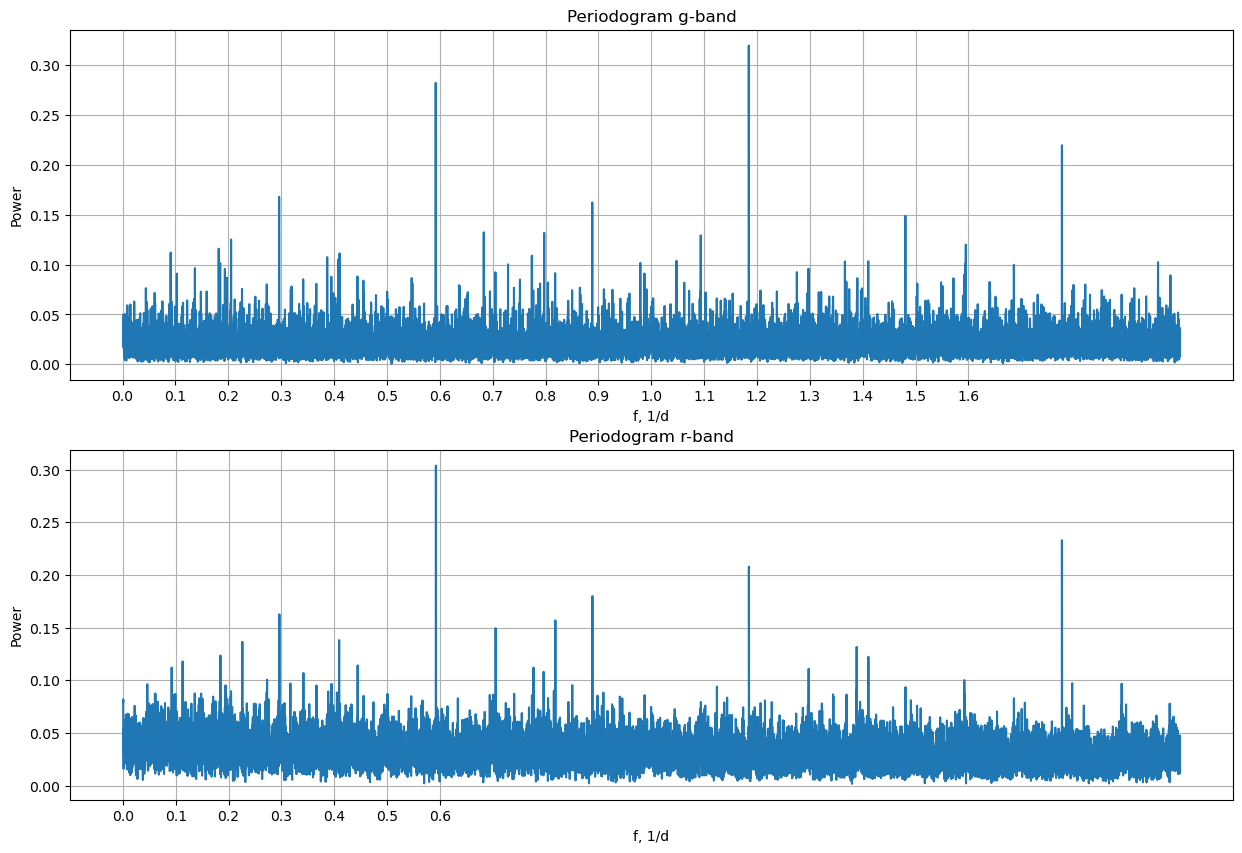

In [93]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.plot(frequency_g, power_g)
plt.title("Periodogram g-band")
plt.grid()
plt.xticks(np.arange(0, 1.61, 0.1)) 

'''
for i in range(len(fr_g_em)):
    plt.axvline(x = fr_g_em[i], color = "y", linestyle=':')
'''

'''
plt.axvline(x = frequency_g[np.argmax(power_g)], color = "g", linestyle=':')
plt.axvline(x = frequency_g[np.argmax(power_g)]/2, color = "g", linestyle=':')
plt.axvline(x = frequency_r_add[np.argmax(power_r_add)], color = "r", linestyle=':')
'''

plt.xlabel('f, 1/d')
plt.ylabel('Power')

plt.subplot(2, 1, 2)
plt.plot(frequency_r_add, power_r_add)
plt.title("Periodogram r-band")
plt.grid()
plt.xticks(np.arange(0, 0.61, 0.1)) 

'''
plt.axvline(x = frequency_g[np.argmax(power_g)], color = "g", linestyle=':')
plt.axvline(x = frequency_g[np.argmax(power_g)]/2, color = "g", linestyle=':')
plt.axvline(x = frequency_r_add[np.argmax(power_r_add)], color = "r", linestyle=':')
'''

plt.xlabel('f, 1/d')
plt.ylabel('Power')


'''
plt.subplot(3, 1, 3)
plt.plot(frequency_r_, power_r_)
plt.grid()
plt.title("Periodogram R-band")
plt.xlabel('f, 1/d')
plt.ylabel('Power')
'''
'''
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(frequency_g, power_g)
plt.subplot(1,2,2)
plt.plot(period, power_g)
plt.show()
'''

In [42]:
from heapq import nlargest

res = nlargest(15, power_g)
res

[0.09678460534759045,
 0.08914378161130836,
 0.08569359223901345,
 0.08231109806304766,
 0.08200426281688404,
 0.07819911013102741,
 0.07216738633537229,
 0.07104073846010078,
 0.07047688645566468,
 0.06856804858188129,
 0.06832109301269476,
 0.068118523152547,
 0.06782024126705763,
 0.06761465071502025,
 0.06760276641534195]

In [97]:
from heapq import nlargest

res = nlargest(15, power_r_add)
res

[0.3038501820788176,
 0.23304628298714472,
 0.20791246937031677,
 0.2039299016730583,
 0.1799681532533811,
 0.17800732532592675,
 0.16261355551962095,
 0.15681630142180658,
 0.15267010826335767,
 0.14945366388542192,
 0.1381876787358993,
 0.1365452555940235,
 0.13629445236242974,
 0.13305575560269953,
 0.13170571170191067]

In [66]:
frequency_g[7123], power_g[7123]

(0.5922941955802414, 0.08569359223901345)

In [75]:
#nterms=1
best_frequency_g1 = frequency_g[np.argmax(power_g)]
fap1 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g.max())
best_frequency_g1, 1 / best_frequency_g1, power_g.max(), fap1

(1.1845015227274325,
 0.8442369898329896,
 0.09678460534759045,
 8.754451750675821e-12)

In [81]:
#nterms=1
best_frequency_g1 = frequency_g[7123]
fap1 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g[7123])
best_frequency_g1, 1 / best_frequency_g1, power_g[7123], fap1

(0.5922941955802414,
 1.688350160211091,
 0.08569359223901345,
 5.223360358720049e-10)

In [83]:
#nterms=2
best_frequency_g2 = frequency_g[np.argmax(power_g)]
fap2 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g.max())
best_frequency_g2, 1 / best_frequency_g2, power_g.max(), fap2

(1.1845015227274325,
 0.8442369898329896,
 0.17822762380838256,
 1.3221195251439198e-25)

In [84]:
#nterms=2
best_frequency_g2 = frequency_g[7123]
fap2 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g[7123])
best_frequency_g2, 1 / best_frequency_g2, power_g[7123], fap2

(0.5922941955802414,
 1.688350160211091,
 0.16681661491753125,
 1.390546018509176e-23)

In [90]:
#nterms=3
best_frequency_g3 = frequency_g[np.argmax(power_g)]
fap3 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g.max())
best_frequency_g3, 1 / best_frequency_g3, power_g.max(), fap3

(1.1845015227274325,
 0.8442369898329896,
 0.2665477079171495,
 2.6277040346710234e-42)

In [91]:
#nterms=3
best_frequency_g3 = frequency_g[7123]
fap3 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g[7123])
best_frequency_g3, 1 / best_frequency_g3, power_g[7123], fap3

(0.5922941955802414,
 1.688350160211091,
 0.23194053078030874,
 1.5746789970043058e-35)

In [94]:
#nterms=4
best_frequency_g4 = frequency_g[np.argmax(power_g)]
fap4 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g.max())
best_frequency_g4, 1 / best_frequency_g4, power_g.max(), fap4

(1.1845015227274325,
 0.8442369898329896,
 0.31927730054590786,
 2.7683020803824123e-53)

In [95]:
#nterms=4
best_frequency_g4 = frequency_g[7123]
fap4 = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g[7123])
best_frequency_g4, 1 / best_frequency_g4, power_g[7123], fap4

(0.5922941955802414,
 1.688350160211091,
 0.2819120597820906,
 2.0216423139477192e-45)

In [96]:
#nterms=4
best_frequency_r_add4 = frequency_r_add[np.argmax(power_r_add)]
fap4 = LombScargle(mjd_r_add, mag_r_add).false_alarm_probability(power_r_add.max())
best_frequency_r_add4, 1 / best_frequency_r_add4, power_r_add.max(), fap4

(0.5922352220525886,
 1.6885182825401142,
 0.3038501820788176,
 1.9220226488940635e-168)

In [99]:
best_frequency_g = frequency_g[np.argmax(power_g)]
period = 1 / (best_frequency_g/4)
period

3.3769479593319582

In [102]:
min_g = mjd_g[np.argmax(mag_g)]
min_g

59306.1575

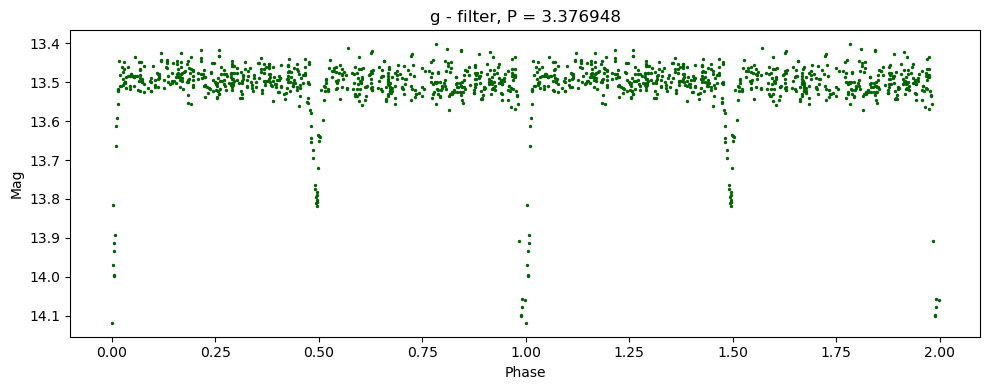

In [109]:
phase_g = ((mjd_g - min_g) / period) % 1.0

phase_g_new = np.concatenate((phase_g, [x + 1 for x in phase_g]))
mag_g_new = np.concatenate((mag_g, mag_g))

#print(frequency_g[np.argmax(power_g)] - phase_g[np.argmax(mag_g)], 4/frequency_g[np.argmax(power_g)])

plt.figure(figsize=(10, 4))
plt.scatter(phase_g_new, mag_g_new, s = 2, color = "darkgreen")

plt.xlabel('Phase')
plt.ylabel('Mag')
#plt.xlim(-0.5, 1.5)
plt.title(f"g - filter, P = {period:.6f}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [110]:
min_r = mjd_r[np.argmax(mag_r)]
min_r

58833.3756829

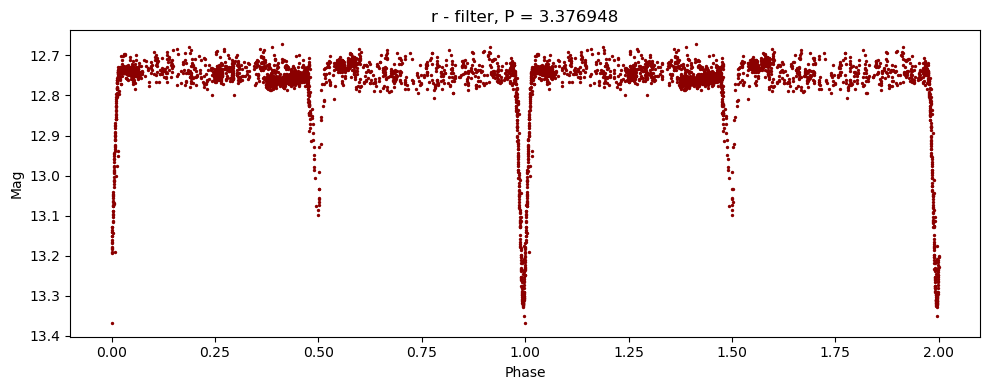

In [111]:
phase_r = ((mjd_r - min_r) / period) % 1.0

phase_r_new = np.concatenate((phase_r, [x + 1 for x in phase_r]))
mag_r_new = np.concatenate((mag_r, mag_r))

#print(frequency_g[np.argmax(power_g)] - phase_g[np.argmax(mag_g)], 4/frequency_g[np.argmax(power_g)])

plt.figure(figsize=(10, 4))
plt.scatter(phase_r_new, mag_r_new, s = 2, color = "darkred")

plt.xlabel('Phase')
plt.ylabel('Mag')
#plt.xlim(-0.5, 1.5)
plt.title(f"r - filter, P = {period:.6f}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

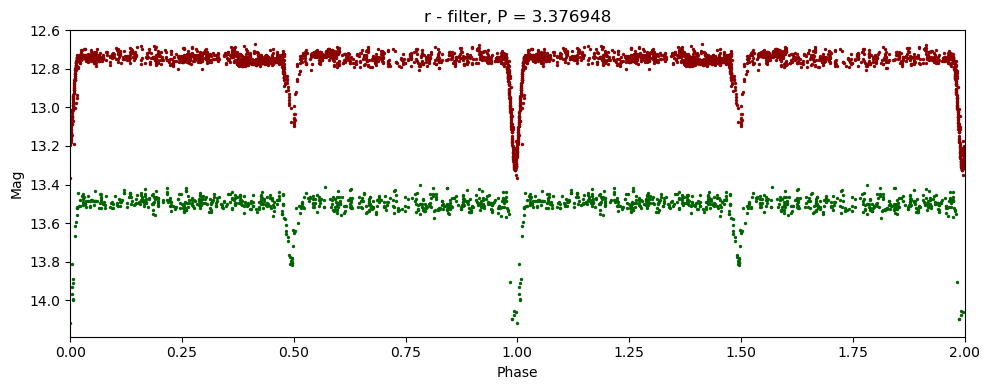

In [112]:
plt.figure(figsize=(10, 4))
plt.scatter(phase_g_new, mag_g_new, s = 2, color = "darkgreen")
plt.scatter(phase_r_new, mag_r_new, s = 2, color = "darkred")

plt.xlabel('Phase')
plt.ylabel('Mag')
plt.xlim(0, 2)
plt.title(f"r - filter, P = {4/frequency_g[np.argmax(power_g)]:.6f}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## ...

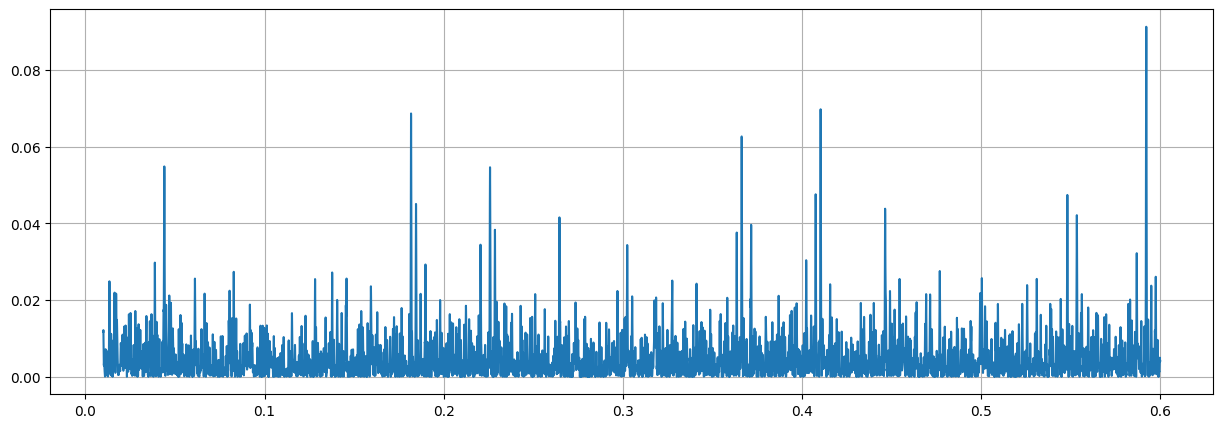

In [16]:
frequency = np.linspace(0.01, 0.6, 100000)

power = LombScargle(mjd_g, mag_g).power(frequency)

fig, ax = plt.subplots(figsize=(15, 5))
plt.grid()
ax.plot(frequency, power)

In [12]:
power.sort()
power

array([4.35448249e-08, 7.89198276e-08, 1.09893130e-07, ...,
       8.75945043e-02, 8.76724600e-02, 8.77986689e-02])

In [65]:
ls = LombScargle(mjd_g, mag_g)
ls.false_alarm_probability(power.max(), method='baluev')

2.4146719818085455e-10

In [17]:
best_frequency_r = frequency_r[np.argmax(power_r)]
best_frequency_r


NameError: name 'frequency_r' is not defined

In [11]:
power_g[power_g == res[5]]

array([0.06804776])

In [12]:
FG = frequency_g[np.where(power_g > 0.05)]
FG

array([0.04402205, 0.04410506, 0.18173889, 0.1818219 , 0.18190492,
       0.22590125, 0.36635749, 0.3664405 , 0.41035383, 0.41043684,
       0.41051986, 0.59215003, 0.59223304, 0.59231605, 0.59239906,
       0.63631239, 0.6363954 , 0.77402923, 0.77411224, 0.81810858,
       0.81819159, 0.95856482, 0.95864783, 1.18435735, 1.18444036,
       1.18452338, 1.18460639, 1.1846894 ])

In [38]:
fr_g_em = frequency_g[np.where(power_g > (power_g[np.argmax(power_g)] /2))]
fr_g_em

array([0.0440002 , 0.04408321, 0.18171704, 0.18180005, 0.18188306,
       0.2258794 , 0.22596241, 0.36633564, 0.36641865, 0.41033198,
       0.41041499, 0.410498  , 0.41058101, 0.59212817, 0.59221118,
       0.5922942 , 0.59237721, 0.63629053, 0.63637355, 0.77400738,
       0.77409039, 0.7741734 , 0.81808673, 0.81816974, 0.81825275,
       0.95854297, 0.95862598, 0.95870899, 1.1843355 , 1.18441851,
       1.18450152, 1.18458453, 1.18466755])

In [111]:
best_frequency_g = frequency_g[np.argmax(power_g)]
best_frequency_g/2

0.2961470977901207

In [72]:
best_frequency_r_add = frequency_r_add[np.argmax(power_r_add)]
1/best_frequency_r_add

5.41909487976345

In [87]:
frequency_r_add[np.argmax(power_r_add)], 1 / frequency_r_add[np.argmax(power_r_add)]

(1.0000328848720574, 0.9999671162093218)

In [47]:
frequency_r_add[np.argmax(power_r_add)], 1 / frequency_r_add[np.argmax(power_r_add)]

(0.18453266130000867, 5.41909487976345)

In [21]:
frequency_g[np.argmax(power_g)], 1/frequency_g[np.argmax(power_g)]

(1.1845015227274325, 0.8442369898329896)

In [49]:
frequency_g[np.argmax(power_g)] / 2, 2 / frequency_g[np.argmax(power_g)]

(0.2961470977901207, 3.376700320422182)

In [50]:
power_g.max()

0.08643786782029608

In [58]:
from heapq import nlargest

res_g = nlargest(5, power_g)
res_g

[0.08643786782029608,
 0.08302996863516615,
 0.0685742309822799,
 0.06819533649374254,
 0.0663975854954607]

In [62]:
fap = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g.max())
power_g.max(), fap

(0.08643786782029608, 3.9772093627510856e-10)

In [57]:
fap = LombScargle(mjd_r_add, mag_r_add).false_alarm_probability(power_r_add.max())
power_r_add.max(), fap

(0.0947305305382716, 2.199075648943812e-43)

In [55]:
power_g[np.argmax(0.5922941955802414)]

0.045831468286864165

In [53]:
np.argmax(frequency_g)

7216

In [ ]:
frequency_r[np.argmax(power_r)/2]

In [32]:
power_g[np.argmax(power_g)] /2

0.048392302673795226

In [98]:
'''
frequency_g, power_g = LombScargle(mjd_g, mag_g).autopower(minimum_frequency = 1 / 150, maximum_frequency= 0.2, samples_per_peak=5*0.2*T_g) #1 / 2 / dt_g) #1.9
frequency_r, power_r = LombScargle(mjd_r, mag_r).autopower(minimum_frequency = 1 / 150, maximum_frequency= 0.2) #1 / 2 / dt_g)
frequency_r_, power_r_ = LombScargle(mjd_r_, mag_r_).autopower(minimum_frequency = 1 / 150, maximum_frequency= 0.1)

plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(frequency_g, power_g)
plt.title("Periodogram G-band")
plt.xlim(0, 0.2)
plt.grid()
plt.xticks(np.arange(0, 0.2, 0.01)) 

plt.axvline(x = frequency_r[np.argmax(power_r)], color = "g")
plt.xlabel('f, d^{-1}')
plt.ylabel('Power')

plt.subplot(3, 1, 2)
plt.plot(frequency_r, power_r)
plt.title("Periodogram R-band")
plt.xlim(0, 0.2)
plt.grid()
plt.xticks(np.arange(0, 0.2, 0.01)) 
plt.axvline(x = frequency_r[np.argmax(power_r)], color = "r")
plt.xlabel('f, d^{-1}')
plt.ylabel('Power')

plt.subplot(3, 1, 3)
plt.plot(frequency_r_, power_r_)
plt.title("Periodogram R-band")
plt.xlabel('f, d^{-1}')
plt.ylabel('Power')
'''
'''
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(frequency_g, power_g)
plt.subplot(1,2,2)
plt.plot(period, power_g)
plt.show()
'''

'\nplt.figure(figsize=(12,4))\nplt.subplot(1,2,1)\nplt.plot(frequency_g, power_g)\nplt.subplot(1,2,2)\nplt.plot(period, power_g)\nplt.show()\n'

In [49]:
best_frequency_g = frequency_g[np.argmax(power_g)]
period = 1 / (best_frequency_g/4)
period

3.3769479593319582

In [101]:
best_frequency_g = frequency_g[np.argmax(power_g)]
4/best_frequency_g

3.3769479593319582

In [97]:
best_frequency_g = frequency_g[np.argmax(power_g)]
2/best_frequency_g

3.376700320422182

In [113]:
phase_g = []
for i in range(len(mjd_g)):
    phase_g.append(math.modf((mjd_g[i] - mjd_g[0])/(1/frequency_g[np.argmax(power_g)]))[0])

In [114]:
min = phase_g[np.argmax(mag_g)]
min

0.33780176656517824

In [115]:
(mjd_g[399]-59306.1575)/period

NameError: name 'period' is not defined

In [ ]:
frequency_g = 

In [11]:
phase_g = []
for i in range(len(mjd_g)):
    phase_g.append(math.modf((mjd_g[i] - mjd_g[0])/(2/frequency_g[np.argmax(power_g)]))[0] - min)


phase_g_new = np.concatenate((phase_g, [x + 1 for x in phase_g], [y + 2 for y in phase_g]))
mag_g_new = np.concatenate((mag_g, mag_g, mag_g))
magerr_g_new = np.concatenate((magerr_g, magerr_g, magerr_g))

print(frequency_g[np.argmax(power_g)] - phase_g[np.argmax(mag_g)], 4/frequency_g[np.argmax(power_g)])

plt.figure(figsize=(7, 4))
plt.scatter(phase_g_new, mag_g_new, s =3, color = "darkgreen")
#plt.errorbar(phase_g_new, mag_g_new, yerr = magerr_g_new, color = "grey", linestyle='none')

plt.xlabel('Phase')
plt.ylabel('mag')
plt.xlim(0, 2)
plt.title(f"g - filter, P = {1/frequency_g[np.argmax(power_g)]:.6f}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'

In [ ]:
phase_g = []
for i in range(len(mjd_g)):
    phase_g.append(math.modf((mjd_g[i] - mjd_g[np.argmax(mag_g)])/period)[0])

'''
phase_g_new = np.concatenate(([y - 1 for y in phase_g], phase_g, [x + 1 for x in phase_g]))
mag_g_new = np.concatenate((mag_g, mag_g, mag_g))
'''
#print(frequency_g[np.argmax(power_g)] - phase_g[np.argmax(mag_g)], 4/frequency_g[np.argmax(power_g)])

plt.figure(figsize=(10, 4))
plt.scatter(phase_g, mag_g, s = 2)

plt.xlabel('Phase')
plt.ylabel('Mag')
#plt.xlim(-0.5, 1.5)
plt.title("Phase G-band, P = 3.38 d")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [89]:
mjd_r[np.argmax(mag_r)]

58833.3756829

In [119]:
phase_r = []
for i in range(len(mjd_r)):
    phase_r.append(math.modf((mjd_r[i] - mjd_r[0])/(4/frequency_g[np.argmax(power_g)]))[0])
min_r = phase_r[np.argmax(mag_r)]
min_r

0.7774082692410502

In [120]:
frequency_g[np.argmax(power_g)]

0.5922941955802414

In [12]:
phase_r = []
ph_r=[]
mg_r=[]
for i in range(len(mjd_r)):
    phase_r.append(math.modf((mjd_r[i] - mjd_r[0])/(4/frequency_g[np.argmax(power_g)]))[0] - min_r)
    if mjd_r[i] > 60319.12 and mjd_r[i] < 60319.3:
        ph_r.append(math.modf((mjd_r[i] - mjd_r[0])/(4/frequency_g[np.argmax(power_g)]))[0] - min_r)
        mg_r.append(mag_r[i])
        
print(frequency_g[np.argmax(power_g)], 1/frequency_g[np.argmax(power_g)], 2/frequency_g[np.argmax(power_g)], 4/frequency_g[np.argmax(power_g)], frequency_g[np.argmax(power_g)]/2, frequency_g[np.argmax(power_g)]/4)

phase_r_new = np.concatenate((phase_r, [x + 1 for x in phase_r], [y + 2 for y in phase_r]))
mag_r_new = np.concatenate((mag_r, mag_r, mag_r))

ph_r = np.concatenate((ph_r, [x + 1 for x in ph_r], [x + 2 for x in ph_r]))
mg_r = np.concatenate((mg_r, mg_r, mg_r))

plt.figure(figsize=(10, 4))
plt.scatter(phase_r_new, mag_r_new, s = 2, color = "darkred")
plt.scatter(ph_r, mg_r, s = 2, color='r')

plt.xlabel('Phase')
plt.ylabel('Mag')
plt.xlim(0, 2)
plt.title(f"r - filter, P = {4/frequency_g[np.argmax(power_g)]:.6f}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

NameError: name 'min_r' is not defined

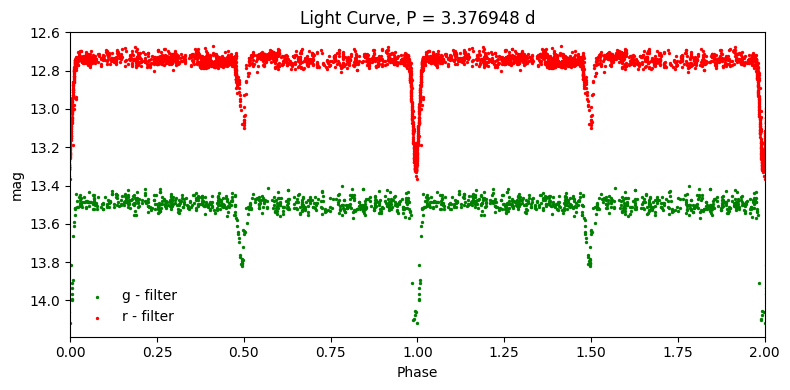

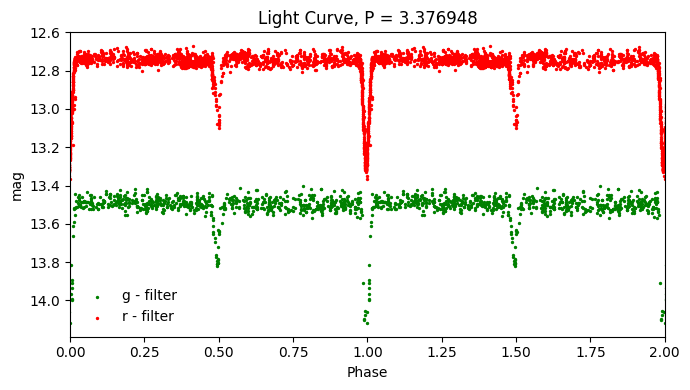

In [66]:
plt.figure(figsize=(7, 4))
plt.scatter(phase_g_new, mag_g_new, s = 2, color = "g", label = "g - filter")
plt.scatter(phase_r_new, mag_r_new, s = 2, color = "r", label = "r - filter")
#plt.scatter(ph_r, mg_r, s = 2, color='r')

plt.xlabel('Phase')
plt.ylabel('mag')
plt.xlim(0, 2)
plt.title(f"Light Curve, P = {4/frequency_g[np.argmax(power_g)]:.6f}")
plt.gca().invert_yaxis()
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [149]:
mag_r_norm = []
for i in range(len(mag_r_new)):
    mag_r_norm.append((mag_r_new[i] - mag_r_new.mean()) / (mag_r_new.max() - mag_r_new.min()))

In [158]:
mag_g_norm = []
for j in range(len(mag_g_new)):
    mag_g_norm.append((mag_g_new[j] - mag_g_new.mean()) / (mag_g_new.max() - mag_g_new.min()))

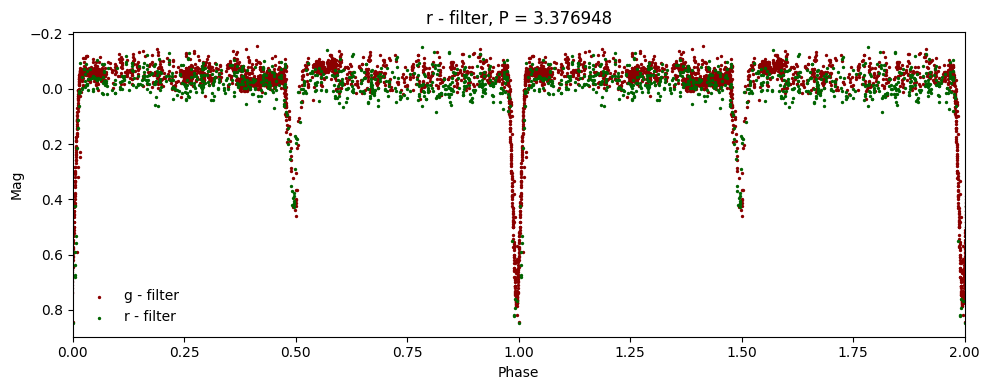

In [162]:
plt.figure(figsize=(10, 4))
plt.scatter(phase_r_new, mag_r_norm, s = 2, color = "darkred", label = "g - filter")
plt.scatter(phase_g_new, mag_g_norm, s = 2, color = "darkgreen", label = "r - filter")

plt.xlabel('Phase')
plt.ylabel('Norm mag')
plt.xlim(0, 2)
plt.title(f"r - filter, P = {4/frequency_g[np.argmax(power_g)]:.6f}")
plt.gca().invert_yaxis()
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [108]:
p = 2/frequency_g[np.argmax(power_g)]
p

3.376700320422182

In [139]:
fff = frequency_g[np.argmax(power_g)]/4

In [110]:
power_g[np.where(frequency_g == 0.59223304)]

array([], dtype=float64)

In [109]:
fap = LombScargle(mjd_g, mag_g).false_alarm_probability(power_g.max())
fap

3.9772093627510856e-10

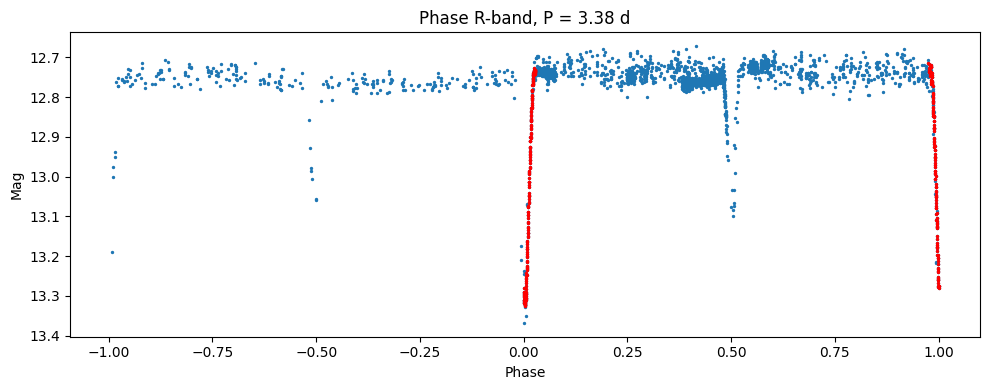

In [88]:
phase_r = []
ph_r=[]
mg_r=[]
for i in range(len(mjd_r)):
    phase_r.append((math.modf((mjd_r[i] - mjd_r[np.argmax(mag_r)])/period)[0]))
    if mjd_r[i] > 60319.12 and mjd_r[i] < 60319.3:
        ph_r.append((math.modf((mjd_r[i] - mjd_r[np.argmax(mag_r)])/period)[0]))
        mg_r.append(mag_r[i])
'''
phase_g_new = np.concatenate(([y - 1 for y in phase_g], phase_g, [x + 1 for x in phase_g]))
mag_g_new = np.concatenate((mag_g, mag_g, mag_g))

phase_r_new = np.concatenate((phase_r, [x + 1 for x in phase_r], [y + 2 for y in phase_r]))
mag_r_new = np.concatenate((mag_r_, mag_r_, mag_r_))

ph_r = np.concatenate((ph_r, [x + 1 for x in ph_r]))
mg_r = np.concatenate((mg_r, mg_r))
'''

#print(frequency_g[np.argmax(power_g)] - phase_g[np.argmax(mag_g)], 4/frequency_g[np.argmax(power_g)])

plt.figure(figsize=(10, 4))
plt.scatter(phase_r, mag_r, s = 2)
plt.scatter(ph_r, mg_r, s = 2, color='r')

plt.xlabel('Phase')
plt.ylabel('Mag')
#plt.xlim(-0.5, 1.5)
plt.title("Phase R-band, P = 3.38 d")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [23]:
min_r = phase_r[np.argmax(mag_r)]
min_r

0.7807826041591284

1.1845233760711373 0.844221414453491 1.688442828906982 3.376885657813964 0.5922616880355687 0.29613084401778433


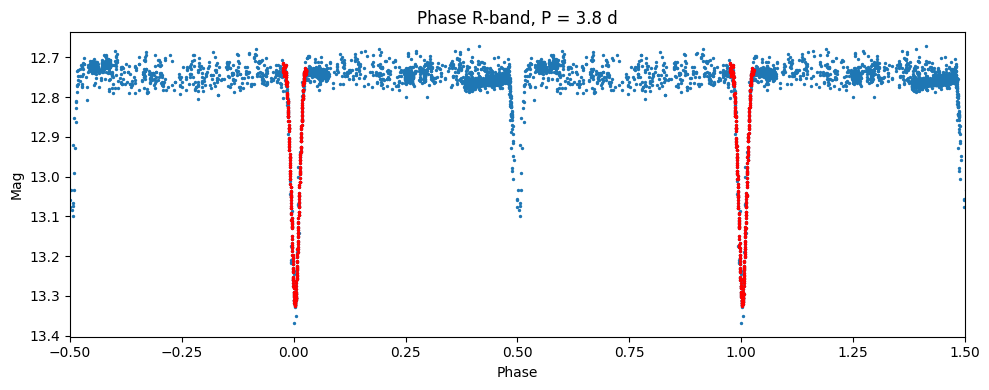

In [49]:
phase_r = []
ph_r=[]
mg_r=[]
for i in range(len(mjd_r)):
    phase_r.append(math.modf((mjd_r[i] - mjd_r[0])/(4/frequency_g[np.argmax(power_g)]))[0] - min_r)
    if mjd_r[i] > 60319.12 and mjd_r[i] < 60319.3:
        ph_r.append(math.modf((mjd_r[i] - mjd_r[0])/(4/frequency_g[np.argmax(power_g)]))[0] - min_r)
        mg_r.append(mag_r[i])
        
print(frequency_g[np.argmax(power_g)], 1/frequency_g[np.argmax(power_g)], 2/frequency_g[np.argmax(power_g)], 4/frequency_g[np.argmax(power_g)], frequency_g[np.argmax(power_g)]/2, frequency_g[np.argmax(power_g)]/4)

phase_r_new = np.concatenate((phase_r, [x + 1 for x in phase_r], [y + 2 for y in phase_r]))
mag_r_new = np.concatenate((mag_r, mag_r, mag_r))

ph_r = np.concatenate((ph_r, [x + 1 for x in ph_r]))
mg_r = np.concatenate((mg_r, mg_r))

plt.figure(figsize=(10, 4))
plt.scatter(phase_r_new, mag_r_new, s = 2)
plt.scatter(ph_r, mg_r, s = 2, color='r')

plt.xlabel('Phase')
plt.ylabel('Mag')
plt.xlim(-0.5, 1.5)
plt.title("Phase R-band, P = 3.8 d")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [54]:
min_r = phase_r[np.argmax(mag_r_)]
min_r

NameError: name 'mag_r_' is not defined

In [98]:
1/0.009

111.11111111111111

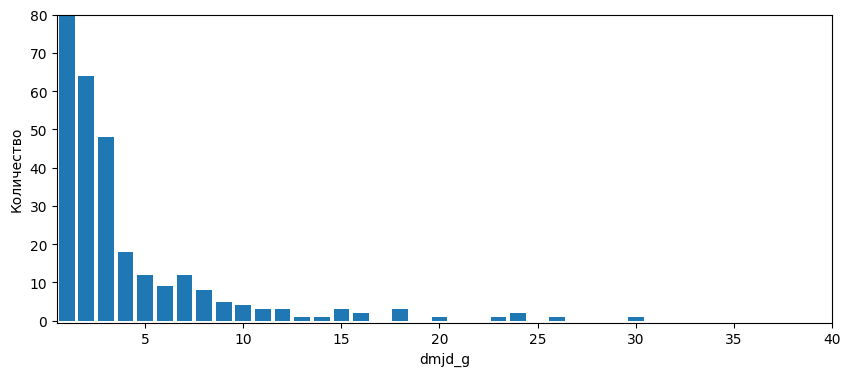

In [90]:
unique_values, counts = np.unique(dmjd_g, return_counts=True)

plt.figure(figsize=(10, 4))

plt.bar(unique_values, counts)

plt.xlim(0.5, 40)
plt.ylim(-0.5, 80)

plt.xlabel("dmjd_g")
plt.ylabel("Количество")

plt.show()

In [75]:
print(unique_values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  20  23  24  26  30  73 108 119 121 127 136 140 150]


In [94]:
print(counts)

[349 124  64  48  18  12   9  12   8   5   4   3   3   1   1   3   2   3
   1   1   2   1   1   1   1   1   1   1   1   1   1]


In [72]:
dmjd_g = []
mjd_g_sort = sorted(mjd_g)
for i in range(len(mjd_g_sort)-1):
    dmjd_g.append(int(mjd_g_sort[i+1] - mjd_g_sort[i]))
print(dmjd_g)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 14, 2, 1, 0, 0, 0, 108, 0, 3, 12, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 6, 0, 24, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 3, 0, 2, 13, 0, 7, 3, 0, 0, 0, 2, 0, 4, 3, 0, 0, 0, 0, 5, 0, 1, 2, 0, 2, 0, 2, 0, 9, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 7, 1, 0, 0, 0, 10, 4, 0, 0, 0, 7, 11, 0, 0, 0, 2, 0, 4, 0, 1, 0, 4, 0, 8, 0, 0, 3, 0, 1, 0, 7, 119, 0, 3, 0, 2, 2, 1, 1, 1, 3, 0, 1, 3, 0, 3, 0, 3, 3, 0, 4, 0, 6, 0, 2, 3, 0, 2, 0, 5, 0, 5, 0, 6, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 1, 3, 1, 0, 4, 0, 8, 12, 0, 2, 9, 0, 7, 0, 6, 0, 7, 0, 0, 3, 0, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 3, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 7, 23, 15, 136, 0, 2, 0, 1, 0, 2, 11, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 3, 5, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 4, 0, 2, 0, 1, 0, 1, 9, 0, 1, 0, 0, 1, 0, 0, 4, 3, 0, 1, 0, 6, 0, 4,

In [144]:
dmjd_r_add = []
mjd_r_add_sort = sorted(mjd_r_add)
for i in range(len(mjd_r_add_sort)-1):
    dmjd_r_add.append(round(mjd_r_add_sort[i+1] - mjd_r_add_sort[i], 0))
print(dmjd_r_add)

[2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 10.0, 117.0, 3.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 6.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 7.0, 0.0, 25.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 0.0, 4.0, 0.0, 2.0, 0.0, 6.0, 0.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 5.0, 2.0, 0.0, 1.0, 1.0, 2.0, 0.0, 3.0, 0.0, 9.0, 1.0, 0.0, 1.0, 0.0, 4.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0, 9.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 8.0, 1.0, 0.0, 3.0, 0.0, 8.0, 0.0, 5.0, 0.0, 1.0, 0.0, 7.0, 0.0, 12.0, 0.0, 1.0, 0.0, 2.0, 0.0, 5.0, 0.0, 15.0, 0.0, 4.0, 0.0, 6.0, 5.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 108

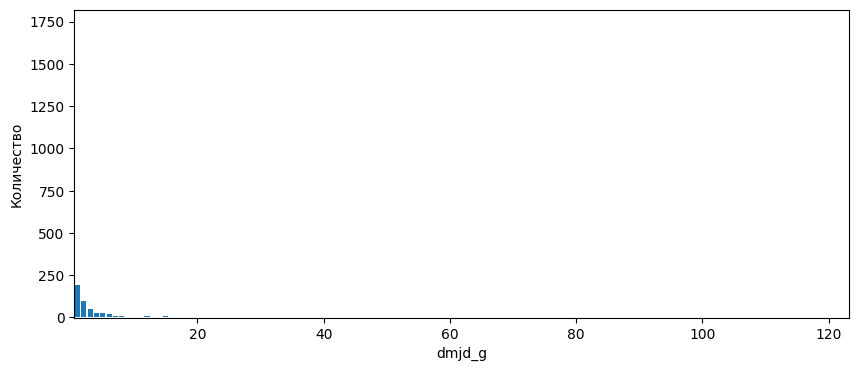

In [145]:
unique_values_r_add, counts_r_add = np.unique(dmjd_r_add, return_counts=True)

plt.figure(figsize=(10, 4))

plt.bar(unique_values_r_add, counts_r_add)

plt.xlim(0.5, )
plt.ylim(-0.5, )

plt.xlabel("dmjd_g")
plt.ylabel("Количество")

plt.show()

In [101]:
print(unique_values_r_add)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  21  24  25  27  43  73  82  83  84  89 108 117]


In [102]:
print(counts_r_add)

[1854  135   71   31   28   22   12    7    6    4    2    1    5    4
    2    2    1    1    1    1    1    1    1    1    1    1    1    1
    1    1]


In [52]:
1/0.14

7.142857142857142

In [48]:
phase_r = math.modf(np.subtract(phase_r, min_r)[0])
phase_r

(-0.3423478124773851, -2.0)

In [117]:
phase_r_2 = []
mag_r_2 = []
for i in range(len(phase_r)):
    phase_r_2.append(phase_r[i] + 1)
    mag_r_2.append(mag_r_[i] + 0)
phase_r_new = np.concatenate((phase_r, [x + 1 for x in phase_r], [y + 2 for y in phase_r]))
mag_r_new = np.concatenate((mag_r_, mag_r_, mag_r_))
print(len(mag_r_new), len(mag_r_), len(phase_r_new))
print([x + 1 for x in phase_r])
#print(mag_r_new, mag_r_, phase_r_new)

8658 2886 8658
[0.21921739584087163, 1.1037279986426658, 1.123963186849088, 1.0058359576671947, 0.8778640871622727, 0.8971087688087422, 1.1739748227793854, 0.48935760193624844, 0.7651165947746108, 0.7857562000972607, 1.061326709744229, 0.363171391274939, 0.659350650082402, 0.9708502313160849, 1.0432207562223397, 0.3183833840990431, 0.6359288487076284, 0.9317310819069746, 1.2120690762101702, 0.5215087863903278, 0.8145314477530903, 1.1133737534353187, 0.4092102778425115, 0.7062840692861272, 0.9934150984807175, 0.30194313041972265, 0.594057548582704, 0.8775178491227535, 0.4851486873945987, 0.777873151470196, 1.0788850126912166, 0.3742485375664941, 0.6313318222140936, 0.6447568299262727, 0.9606742913288429, 0.25805652596489637, 0.552388442210642, 0.8571361202351753, 0.9092851674943176, 0.28519602090394613, 0.5862661297973801, 0.8742539653810653, 1.191538929341199, 0.48627526270101384, 0.7928086005691526, 0.3734146803993781, 0.6774734545798324, 0.951875220380721, 0.2439861738896525, 0.83739

In [110]:
phase_r = []
ph_r = []
mg_r = []
for i in range(len(mjd_r_)):
    phase_r.append(math.modf((mjd_r_[i] - mjd_r_[0])/(4/frequency_g[np.argmax(power_g)]))[0] - min_r)
    if mjd_r_[i] > 60319.15 and mjd_r_[i] < 60319.30:
        ph_r.append(math.modf((mjd_r_[i] - mjd_r_[0])/(4/frequency_g[np.argmax(power_g)]))[0] - min_r)
        mg_r.append(mag_r[i])


phase_r_new = np.concatenate((phase_r, [x + 1 for x in phase_r], [y + 2 for y in phase_r]))
mag_r_new = np.concatenate((mag_r_, mag_r_, mag_r_))

print(frequency_g[np.argmax(power_g)], 1/frequency_g[np.argmax(power_g)], 2/frequency_g[np.argmax(power_g)], 4/frequency_g[np.argmax(power_g)], frequency_g[np.argmax(power_g)]/2, frequency_g[np.argmax(power_g)]/4)

plt.figure(figsize=(10, 4))
plt.scatter(phase_r_new, mag_r_new, s = 2)
plt.scatter(ph_r, mg_r, s = 2, color='r')

plt.xlabel('Phase')
plt.ylabel('Mag')
plt.xlim(-0.5, 1.5)
plt.title("Phase R-band, P = 3.38 d")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

2886

In [20]:
power_g[np.argmax(power_g)]

0.08735238287784532

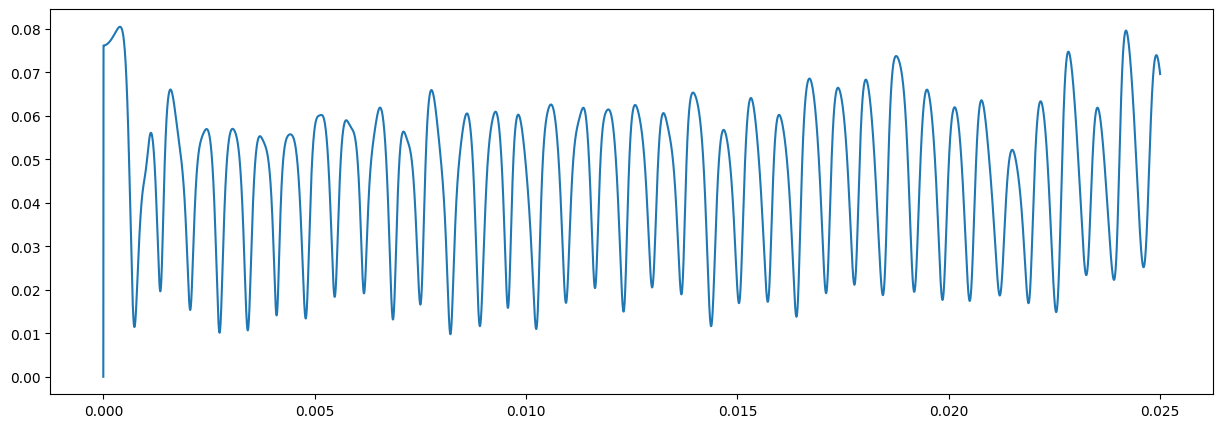

In [26]:
frequency = np.linspace(0, 0.025, 10000)

power_r_ = LombScargle(mjd_r, mag_r, magerr_r).power(frequency) #normalization=""

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(frequency, power_r_)

In [36]:
frequency_r, power_r = LombScargle(mjd_r, mag_r, normalization='psd').autopower()

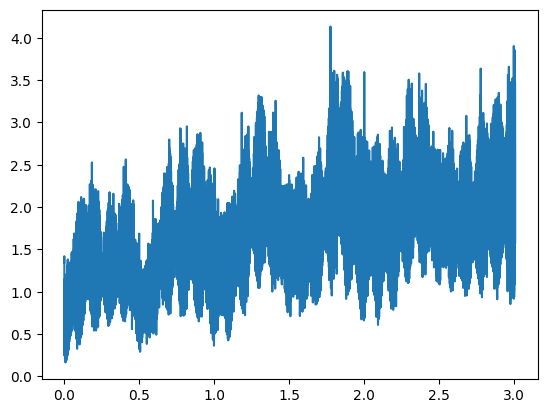

In [37]:
plt.plot(frequency_r, power_r)

In [23]:
power_r[np.argmax(power_r)]

0.21789259957809087

In [30]:
best_frequency_r = frequency_r_add[np.argmax(power_r_add)]
1/best_frequency_r

5.419832949481896

In [31]:
1/.5628379342849761

1.7767103798189978

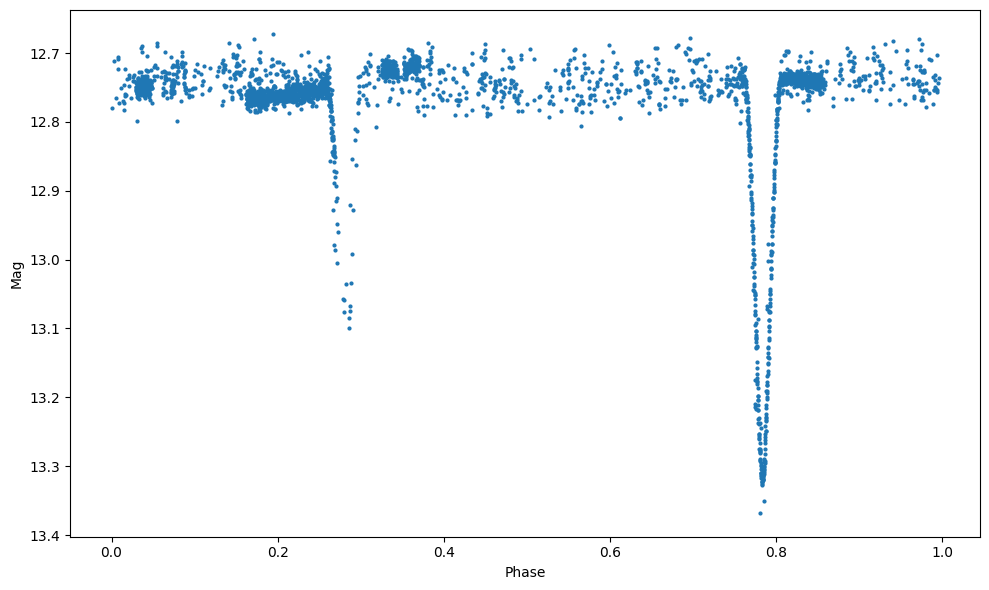

In [44]:
phase_r = []
for i in range(len(mjd_r)):
    phase_r.append(math.modf((mjd_r[i] - mjd_r[0])/(4/(best_frequency_g*1)))[0])


plt.figure(figsize=(10,6))
plt.scatter(phase_r, mag_r, s = 4)

plt.xlabel('Phase')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [35]:
1/1.2

0.8333333333333334

In [98]:
mjd_g_2 = band_g.mjd.to_numpy()
mjd_g_2.sort()
d_mjd_g = []
for i in range(len(mjd_g_2)-1):
    d_mjd_g.append(mjd_g_2[i+1] - mjd_g_2[i])
    #print(i, mjd_g_sort[i], mjd_g_sort[i+1] - mjd_g_sort[i])
min(d_mjd_g), 1/np.mean(d_mjd_g)

(0.000451300002168864, 0.28348584555756345)

In [28]:
mjd_r_2 = band_r.mjd.to_numpy()
mjd_r_2.sort()
d_mjd_r = []
for i in range(len(mjd_r_2)-1):
    d_mjd_r.append(mjd_r_2[i+1] - mjd_r_2[i])
    #print(i, mjd_g_sort[i], mjd_g_sort[i+1] - mjd_g_sort[i])
min(d_mjd_r), d_mjd_r.index(min(d_mjd_r)), mjd_r_2[d_mjd_r.index(min(d_mjd_r))], mjd_r_2[d_mjd_r.index(min(d_mjd_r)) + 1]

(0.0003355999942868948, 182, 58597.1660417, 58597.1663773)

In [12]:
0.1663773-0.1660417

0.0003356000000000192

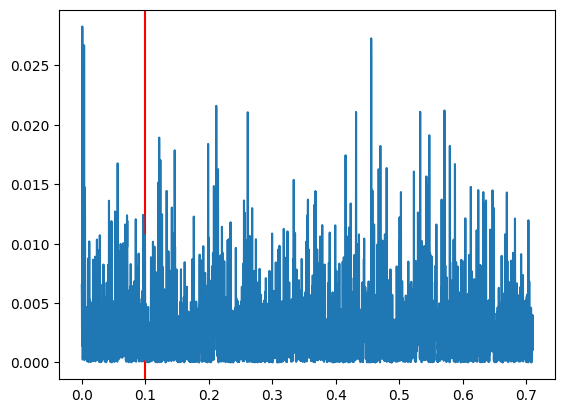

In [30]:
frequency_g, power_g = LombScargle(mjd_g, mag_g).autopower()#nyquist_factor = )
fig, ax = plt.subplots()

plt.axvline(x = (0.1), color = "r")
plt.plot(frequency_g, power_g)

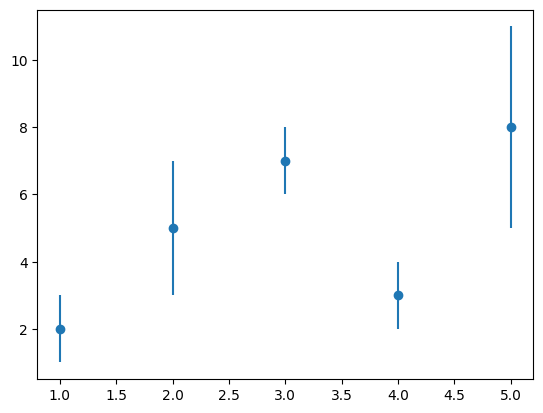

In [122]:
a = [1, 2, 3, 4, 5]
b = [2, 5, 7, 3, 8]
c = [1, 2, 1, 1, 3]

plt.scatter(a, b)
plt.errorbar(a, b, yerr = c, linestyle='none')
plt.show()

In [141]:
0.0005*24*60*60

43.199999999999996